
PCA

In [2]:
from pathlib import Path
import sys

# Assuming notebook is in project root
PROJECT_ROOT = Path("/scratch/lungerjo/DeepEmotion")
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

import torch
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from omegaconf import OmegaConf
from pathlib import Path
from src.utils import build
from src.utils.dataset import ZarrDataset
from src.models.CNN import CNN  # adjust import to where classes are defined

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cfg = OmegaConf.create({
    "project_root": PROJECT_ROOT,
    "verbose": True,
    "wandb": True,
    "sys_log": True,
    "model": "CNN",
    "CNN": {
        "c1": 16, "c2": 32, "c3": 64,
        "k1": 3, "k2": 3, "k3": 3,
        "pk": 2, "ps": 2,
        "kernel_size": 3, "stride": 1, "padding": 1
    },
    "train": {
        "epochs": 50, "batch_size": 10, "shuffle": True,
        "train_ratio": 0.8, "print_label_frequencies": True
    },
    "data": {
        "label_mode": "soft_classification",
        "data_path": f"{PROJECT_ROOT}/data/raw/derivatives/non-linear_anatomical_alignment",
        "zarr_path": f"{PROJECT_ROOT}/zarr_datasets",
        "classification_label_path": f"{PROJECT_ROOT}/annotations/classification.tsv",
        "soft_classification_label_path": f"{PROJECT_ROOT}/annotations/soft_classification.tsv",
        "sessions": ["01","02","03","04","05","06","07","08"],
        "file_pattern_template": "*_ses-forrestgump_task-forrestgump_rec-dico7Tad2grpbold7TadNL_run-{}_bold.nii.gz",
        "subjects": [
            "sub-01"#,"sub-02","sub-03","sub-04","sub-05",
            #"sub-06","sub-07","sub-08","sub-09","sub-11",
            #"sub-12","sub-13","sub-14","sub-15","sub-16",
            #"sub-17","sub-18","sub-19","sub-20"
        ],
        "session_offsets": [0,902,1784,2660,3636,4560,5438,6522],
        "normalization": False,
        "weight_decay": 0,
        "learning_rate": 1e-5,
        "seed": 42,
        "save_model": True,
        "load_model": False,
        "save_model_path": "output/models",
        "load_model_path": None,
        "classification_emotion_idx": {
            "NONE": 0, "HAPPINESS": 1, "FEAR": 2,
            "SADNESS": 3, "LOVE": 4, "ANGER": 5
        },
        "soft_classification_output_dim": 19
    }
})

cfg.project_root = str(Path().resolve())

dataset = ZarrDataset(zarr_path=cfg.data.zarr_path,
                      label_mode="soft_classification",
                      debug=False,
                      cfg=cfg)

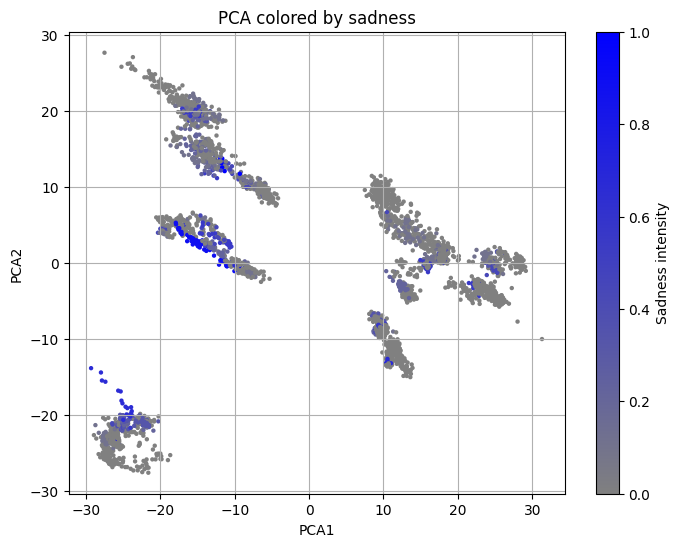

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the CSV
df = pd.read_csv("/home/lungerjo/scratch/DeepEmotion/output/PCA/hidden/i8adt0w5")

# Extract PCA coordinates and sadness values
x = df["PCA1"]
y = df["PCA2"]
sadness = df["e_happiness"]

# Define colormap: greyscale for sadness=0, blue for sadness=1
cmap = mcolors.LinearSegmentedColormap.from_list("grey_to_blue", ["grey", "blue"])
norm = mcolors.Normalize(vmin=0, vmax=1)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=sadness, cmap=cmap, norm=norm, s=10, edgecolors='none')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA colored by sadness")
plt.colorbar(label="Sadness intensity")
plt.grid(True)
plt.show()


In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [9]:
print(dataset)
for attr, value in vars(dataset).items():
    print(f"{attr}: {type(value)}")
print(f"dataset.subject_ids.shape: {dataset.subject_ids.shape}")
print(f"dataset.subject_ids: {dataset.subject_ids}")
print(f"dataset.session_ids.shape: {dataset.subject_ids.shape}")
print(f"dataset.session_ids: {dataset.subject_ids}")


debug: <class 'bool'>
store: <class 'zarr.core.group.Group'>
label_mode: <class 'str'>
data: <class 'zarr.core.array.Array'>
valid_timepoints: <class 'numpy.ndarray'>
file_paths: <class 'numpy.ndarray'>
subject_ids: <class 'numpy.ndarray'>
session_ids: <class 'numpy.ndarray'>
file_to_subject: <class 'numpy.ndarray'>
file_to_session: <class 'numpy.ndarray'>
emotions: <class 'list'>
aligned_labels_csv: <class 'str'>
labels: <class 'zarr.core.array.Array'>
valid_indices: <class 'numpy.ndarray'>
allowed_subjects: <class 'set'>
allowed_sessions: <class 'set'>
aligned_labels: <class 'pandas.core.frame.DataFrame'>
dataset.subject_ids.shape: (19,)
dataset.subject_ids: ['sub-01' 'sub-02' 'sub-03' 'sub-04' 'sub-05' 'sub-06' 'sub-07' 'sub-08'
 'sub-09' 'sub-11' 'sub-12' 'sub-13' 'sub-14' 'sub-15' 'sub-16' 'sub-17'
 'sub-18' 'sub-19' 'sub-20']
dataset.session_ids.shape: (19,)
dataset.session_ids: ['sub-01' 'sub-02' 'sub-03' 'sub-04' 'sub-05' 'sub-06' 'sub-07' 'sub-08'
 'sub-09' 'sub-11' 'sub-12' '

In [2]:
!which nvidia-smi
!ls -l /dev/nvidia*
!nvidia-smi

/usr/bin/nvidia-smi


crw-rw-rw- 1 root root 195, 255 Mar 31 08:06 /dev/nvidiactl
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
!which nvidia-smi
!echo $PATH
!nvidia-smi


/usr/bin/nvidia-smi
/home/lungerjo/scratch/DeepEmotion/venv3.11/bin:/scratch/lungerjo/DeepEmotion/venv3.11/bin:/home/lungerjo/.vscode-server/cli/servers/Stable-b1c0a14de1414fcdaa400695b4db1c0799bc3124/server/bin/remote-cli:/opt/software/bin:/opt/software/slurm/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Core/mii/1.1.2/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Core/flexiblascore/3.3.1/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcc12/openmpi/4.1.5/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcccore/ucc/1.2.0/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcccore/pmix/4.2.4/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcccore/libfabric/1.18.0/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcccore/ucx/1.14.1/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcccore/

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
import torch
torch.cuda.is_available()

False

In [8]:
torch.cuda.is_available()

False

In [25]:
# Cell: run 2D PCA on hidden-layer representations with soft-classification labels and metadata

# Assuming notebook is in project root
PROJECT_ROOT = Path("/scratch/lungerjo/DeepEmotion")
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

import torch
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from omegaconf import OmegaConf
from pathlib import Path
from src.utils import build
from src.utils.dataset import ZarrDataset
from src.models.CNN import CNN  # adjust import to where classes are defined

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cfg = OmegaConf.create({
    "project_root": PROJECT_ROOT,
    "verbose": True,
    "wandb": True,
    "sys_log": True,
    "model": "CNN",
    "CNN": {
        "c1": 16, "c2": 32, "c3": 64,
        "k1": 3, "k2": 3, "k3": 3,
        "pk": 2, "ps": 2,
        "kernel_size": 3, "stride": 1, "padding": 1
    },
    "train": {
        "epochs": 50, "batch_size": 10, "shuffle": True,
        "train_ratio": 0.8, "print_label_frequencies": True
    },
    "data": {
        "label_mode": "soft_classification",
        "data_path": f"{PROJECT_ROOT}/data/raw/derivatives/non-linear_anatomical_alignment",
        "zarr_path": f"{PROJECT_ROOT}/zarr_datasets",
        "classification_label_path": f"{PROJECT_ROOT}/annotations/classification.tsv",
        "soft_classification_label_path": f"{PROJECT_ROOT}/annotations/soft_classification.tsv",
        "sessions": ["01","02","03","04","05","06","07","08"],
        "file_pattern_template": "*_ses-forrestgump_task-forrestgump_rec-dico7Tad2grpbold7TadNL_run-{}_bold.nii.gz",
        "subjects": [
            "sub-01"#,"sub-02","sub-03","sub-04","sub-05",
            #"sub-06","sub-07","sub-08","sub-09","sub-11",
            #"sub-12","sub-13","sub-14","sub-15","sub-16",
            #"sub-17","sub-18","sub-19","sub-20"
        ],
        "session_offsets": [0,902,1784,2660,3636,4560,5438,6522],
        "normalization": False,
        "weight_decay": 0,
        "learning_rate": 1e-5,
        "seed": 42,
        "save_model": True,
        "load_model": False,
        "save_model_path": "output/models",
        "load_model_path": None,
        "classification_emotion_idx": {
            "NONE": 0, "HAPPINESS": 1, "FEAR": 2,
            "SADNESS": 3, "LOVE": 4, "ANGER": 5
        },
        "soft_classification_output_dim": 19
    }
})

cfg.project_root = str(Path().resolve())

dataset = ZarrDataset(zarr_path=cfg.data.zarr_path,
                      label_mode="soft_classification",
                      debug=False,
                      cfg=cfg)
loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=4)

output_dim = cfg.data.soft_classification_output_dim
model = CNN(cfg, output_dim)
model.load_state_dict(torch.load(f"{PROJECT_ROOT}/output/models/vcsujcjd"))  # replace with actual path
model.eval()

hidden_list, label_list, subj_list, sess_list, offset_list = [], [], [], [], []

for batch in loader:
    data = batch["data_tensor"]
    with torch.no_grad():
        _, hidden = model(data, return_hidden=True)
    hidden_np = hidden.cpu().numpy()
    for i in range(hidden_np.shape[0]):
        hidden_list.append(hidden_np[i])
        label_list.append(batch["label_tensor"][i].cpu().numpy())
        subj_list.append(batch["subject"][i])
        sess_list.append(batch["session"][i])
        offset_list.append(
            dataset.aligned_labels.loc[
                batch["global_idx"][i].item(), "offset"
            ]
        )

hidden_array = np.stack(hidden_list)
label_array = np.stack(label_list)

# get emotion column names from the aligned-labels DataFrame
soft_label_cols = [c for c in dataset.aligned_labels.columns if c.startswith("e_")]

# build a DataFrame of just the soft labels
soft_df = pd.DataFrame(label_array, columns=soft_label_cols)

# build the rest of your metadata+PCA
meta_df = pd.DataFrame({
    "PCA1": pcs[:,0],
    "PCA2": pcs[:,1],
    "subject": subj_list,
    "session": sess_list,
    "offset": offset_list
})

# combine
df = pd.concat([meta_df, soft_df], axis=1)
df.head()



/home/lungerjo/scratch/DeepEmotion/venv3.11/lib/python3.11/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
/home/lungerjo/scratch/DeepEmotion/venv3.11/lib/python3.11/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Assuming notebook is in project root
project_root = Path("/scratch/lungerjo/DeepEmotion")
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

from utils.dataset import get_data_loaders
import hydra
from omegaconf import DictConfig, OmegaConf
from hydra import initialize, compose
import torch
import os
from src.utils.dataset import get_data_loaders
from models.CNN import CNN
from models.resnet import ResNet, BasicBlock
import pandas as pd
from tqdm import tqdm
from utils.dataset import get_data_loaders
from models.CNN import CNN
from sklearn.decomposition import IncrementalPCA

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"CUDA is available. Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CUDA is NOT available. Using CPU.")

hydra.core.global_hydra.GlobalHydra.instance().clear()
with initialize(version_base=None, config_path="../../src/configs"):
    cfg = compose(config_name="base", overrides=["project_root=/home/paperspace/DeepEmotion"])
print(cfg)

ImportError: cannot import name 'get_data_loaders' from 'utils.dataset' (/scratch/lungerjo/DeepEmotion/src/utils/dataset.py)

In [3]:
train_dataloader, val_dataloader = get_data_loaders(cfg)

num_train_batches = len(train_dataloader)
sample_batch = next(iter(train_dataloader))
batch_data = sample_batch["data_tensor"]

print(f"Cell 2 complete: Loaded the dataset.")
print(f"Number of train batches: {num_train_batches}")
print(f"Shape of one batch of data: {batch_data.shape}")
print(f"batch_size: {cfg.train.batch_size}")

Dataset contains 152 files.
Spatial dimensions: (132, 175, 48)
Maximum timepoints per file: 542
Subjects: ['sub-01' 'sub-02' 'sub-03' 'sub-04' 'sub-05' 'sub-06' 'sub-07' 'sub-08'
 'sub-09' 'sub-11' 'sub-12' 'sub-13' 'sub-14' 'sub-15' 'sub-16' 'sub-17'
 'sub-18' 'sub-19' 'sub-20']
Sessions: ['01' '02' '03' '04' '05' '06' '07' '08']
Emotion categories: ['NONE', 'HAPPINESS', 'FEAR', 'SADNESS', 'LOVE', 'ANGER']
Total valid labeled timepoints: 13813
Cell 2 complete: Loaded the dataset.
Number of train batches: 442
Shape of one batch of data: torch.Size([25, 132, 175, 48])
batch_size: 25


In [5]:
# Invert the label dictionary
inverse_emotion_idx = {v: k for k, v in cfg.data.emotion_idx.items()}

n_components = 2  # if you're only using 2 now
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get dataset dimensions
sample_batch = next(iter(train_dataloader))["data_tensor"]
num_features = sample_batch.shape[1] * sample_batch.shape[2] * sample_batch.shape[3]  # e.g., 132 * 175 * 48

W = torch.randn(num_features, n_components, device=device)
mean_running = torch.zeros(num_features, device=device)
num_samples = 0
results = []

for batch_idx, batch in enumerate(train_dataloader):
    batch_data = batch["data_tensor"].float().to(device, non_blocking=True)
    batch_data = batch_data.view(batch_data.size(0), -1)

    batch_mean = batch_data.mean(dim=0)
    num_samples += batch_data.shape[0]
    mean_running = (mean_running * (num_samples - batch_data.shape[0]) 
                    + batch_data.shape[0] * batch_mean) / num_samples

    batch_data -= mean_running

    # Power iteration / simple incremental update
    temp_projection = batch_data @ W
    U, S, Vh = torch.linalg.svd(temp_projection, full_matrices=False)
    W = W @ Vh[:n_components].T  # W remains [num_features, 2]

    batch_projection = batch_data @ W  # shape [B, 2]

    # Retrieve labels
    labels = batch["label_tensor"]
    
    # Convert to CPU for final results
    batch_projection_cpu = batch_projection.cpu().numpy()
    labels_cpu = labels.cpu().numpy()

    # Store PC values plus label name
    for i in range(batch_projection_cpu.shape[0]):
        pc_values = list(batch_projection_cpu[i])  
        label_idx = labels_cpu[i]
        label_name = inverse_emotion_idx.get(label_idx, "UNK")
        pc_values.append(label_name)
        results.append(pc_values)

# Write to CSV
columns = [f"PC{i+1}" for i in range(n_components)] + ["EmotionLabel"]
df = pd.DataFrame(results, columns=columns)
csv_path = "/home/paperspace/DeepEmotion/output/PCA/raw/sub_ALL.csv"
df.to_csv(csv_path, index=False)
print(f"PCA projections saved to {csv_path}")


OSError: Cannot save file into a non-existent directory: '/home/paperspace/DeepEmotion/src/output/PCA/raw'

In [14]:
import os
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import IncrementalPCA
from omegaconf import OmegaConf
from utils.dataset import get_data_loaders
from models.CNN import CNN


print(cfg.data.zarr_path)

# Load dataloaders
train_dataloader, val_dataloader = get_data_loaders(cfg)

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(cfg=cfg, output_dim=len(cfg.data.emotion_idx))
model.load_state_dict(torch.load(cfg.data.load_model_path, map_location=device))
model.to(device)
model.eval()

# Get hidden state dimension
sample_batch = next(iter(train_dataloader))["data_tensor"].to(device).float()
with torch.no_grad():
    _, hidden_sample = model(sample_batch[:1], return_hidden=True)
hidden_dim = hidden_sample.shape[1]

# Invert emotion label map
inverse_emotion_idx = {v: k for k, v in cfg.data.emotion_idx.items()}

# PCA loop
n_components = 2
num_epochs = 2

for epoch in range(1, num_epochs + 1):
    print(f"\nEpoch {epoch}/{num_epochs}")
    
    ipca = IncrementalPCA(n_components=n_components)

    # Fit PCA incrementally
    for batch in tqdm(train_dataloader, desc=f"Fitting IncrementalPCA Epoch {epoch}"):
        data = batch["data_tensor"].float().to(device)
        with torch.no_grad():
            _, hidden = model(data, return_hidden=True)
        ipca.partial_fit(hidden.cpu().numpy())

# After final epoch, transform and save
all_hidden = []
all_labels = []

for batch in tqdm(train_dataloader, desc="Transforming after final epoch"):
    data = batch["data_tensor"].float().to(device)
    labels = batch["label_tensor"]
    with torch.no_grad():
        _, hidden = model(data, return_hidden=True)
    all_hidden.append(hidden.cpu().numpy())
    all_labels.append(labels.cpu().numpy())

all_hidden = np.concatenate(all_hidden, axis=0)
all_labels = np.concatenate(all_labels, axis=0)
pca_proj = ipca.transform(all_hidden)

results = []
for row, label_idx in zip(pca_proj, all_labels):
    row = list(row)
    row.append(inverse_emotion_idx.get(label_idx, "UNK"))
    results.append(row)

df = pd.DataFrame(results, columns=["PC1", "PC2", "EmotionLabel"])
save_dir = os.path.join(PROJECT_ROOT, "output/PCA/hidden")
os.makedirs(save_dir, exist_ok=True)
csv_path = os.path.join(save_dir, "sub_AL_ao_annotations.csv")
df.to_csv(csv_path, index=False)
print(f"Saved PCA to {csv_path}")


/home/paperspace/DeepEmotion/zarr_datasets/pool_emotions
Dataset contains 152 files.
Spatial dimensions: (132, 175, 48)
Maximum timepoints per file: 542
Subjects: ['sub-01' 'sub-02' 'sub-03' 'sub-04' 'sub-05' 'sub-06' 'sub-07' 'sub-08'
 'sub-09' 'sub-11' 'sub-12' 'sub-13' 'sub-14' 'sub-15' 'sub-16' 'sub-17'
 'sub-18' 'sub-19' 'sub-20']
Sessions: ['01' '02' '03' '04' '05' '06' '07' '08']
Emotion categories: ['NONE', 'HAPPINESS', 'FEAR', 'SADNESS', 'LOVE', 'ANGER']
Total valid labeled timepoints: 13813

Epoch 1/2


Fitting IncrementalPCA Epoch 1: 100%|██████████| 553/553 [06:20<00:00,  1.45it/s]



Epoch 2/2


Transforming after final epoch: 100%|██████████| 553/553 [06:19<00:00,  1.46it/s]


Saved PCA to /home/paperspace/DeepEmotion/output/PCA/hidden/sub_AL_ao_annotations.csv
